In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
confirmed=pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths=pd.read_csv('time_series_covid19_deaths_global.csv')
recovered=pd.read_csv('time_series_covid19_recovered_global.csv')

#delete states
confirmed=confirmed.drop(['Province/State'],axis=1)
deaths=deaths.drop(['Province/State'],axis=1)
recovered=recovered.drop(['Province/State'],axis=1)

confirmed=confirmed.drop(['Lat'],axis=1)
deaths=deaths.drop(['Lat'],axis=1)
recovered=recovered.drop(['Lat'],axis=1)

confirmed=confirmed.drop(['Long'],axis=1)
deaths=deaths.drop(['Long'],axis=1)
recovered=recovered.drop(['Long'],axis=1)

# #group by country
confirmed=confirmed.groupby(['Country/Region']).aggregate('sum')
deaths=deaths.groupby(['Country/Region']).aggregate('sum')
recovered=recovered.groupby(['Country/Region']).aggregate('sum')

confirmed.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525
Albania,0,0,0,0,0,0,0,0,0,0,...,969,981,989,998,1004,1029,1050,1076,1099,1122
Algeria,0,0,0,0,0,0,0,0,0,0,...,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267
Andorra,0,0,0,0,0,0,0,0,0,0,...,762,762,762,762,763,763,763,763,764,764
Angola,0,0,0,0,0,0,0,0,0,0,...,58,60,61,69,70,70,71,74,81,84
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
Argentina,0,0,0,0,0,0,0,0,0,0,...,9931,10649,11353,12076,12628,13228,13933,14702,15419,16214
Armenia,0,0,0,0,0,0,0,0,0,0,...,5606,5928,6302,6661,7113,7402,7774,8216,8676,8927
Australia,0,0,0,0,4,5,5,6,9,9,...,7095,7099,7114,7114,7126,7139,7150,7165,7184,7192


In [3]:
confirmed.index
confirmed.columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/21/20', '5/22/20', '5/23/20', '5/24/20', '5/25/20', '5/26/20',
       '5/27/20', '5/28/20', '5/29/20', '5/30/20'],
      dtype='object', length=130)

In [4]:
confirmed.shape
confirmed.dtypes

1/22/20    int64
1/23/20    int64
1/24/20    int64
1/25/20    int64
1/26/20    int64
           ...  
5/26/20    int64
5/27/20    int64
5/28/20    int64
5/29/20    int64
5/30/20    int64
Length: 130, dtype: object

In [5]:
# confirmed.head()
# deaths.head()

In [6]:
today=confirmed.columns[-1]
yesterday=confirmed.columns[-2]
week=confirmed.columns[-8] #is -8 because -1 is the last column (today's date)
ten_days=confirmed.columns[-11]
twenty_days=confirmed.columns[-21]

In [7]:
#Max Num Of Cases
confirmed[today].max()

1770165

In [8]:
#Min Num Of Cases
confirmed[today].min()

2

In [9]:
#Number Per Country
# confirmed_today=confirmed.groupby(['Country/Region'])[today].max()
# confirmed_today=confirmed_today.sort_values(ascending=False)
# deaths_today=deaths.groupby(['Country/Region'])[today].max()
# deaths_today=deaths_today.sort_values(ascending=False)
# recovered_today=recovered.groupby(['Country/Region'])[today].max()
# recovered_today=recovered_today.sort_values(ascending=False)
confirmed=confirmed.sort_values(by=today,ascending=False)
deaths=deaths.sort_values(by=today,ascending=False)
recovered=recovered.sort_values(by=today,ascending=False)
confirmed_max=confirmed[today]
deaths_max=deaths[today]
recovered_max=recovered[today]

1770165

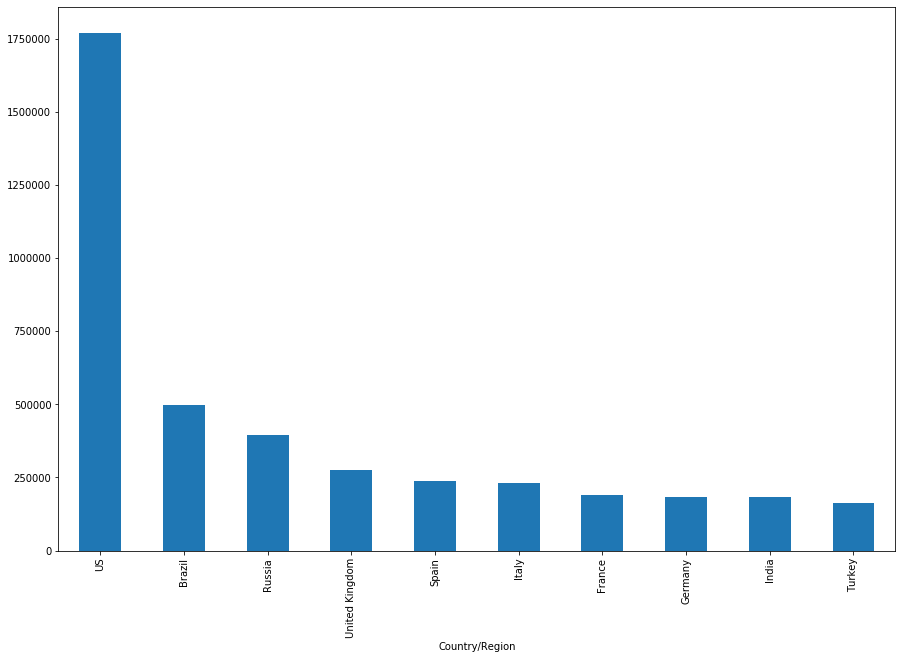

In [10]:
# confirmed_today.head()
confirmed_max.head(10).plot(kind='bar',figsize=(15,10))
confirmed[today].max()

103776

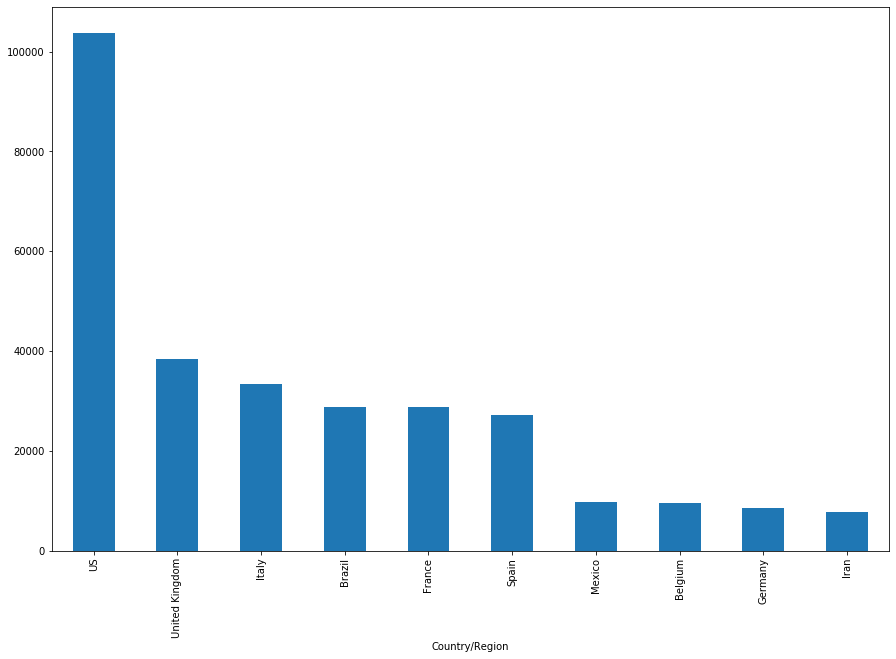

In [11]:
deaths_max.head(10).plot(kind='bar',figsize=(15,10))
deaths[today].max()

416461

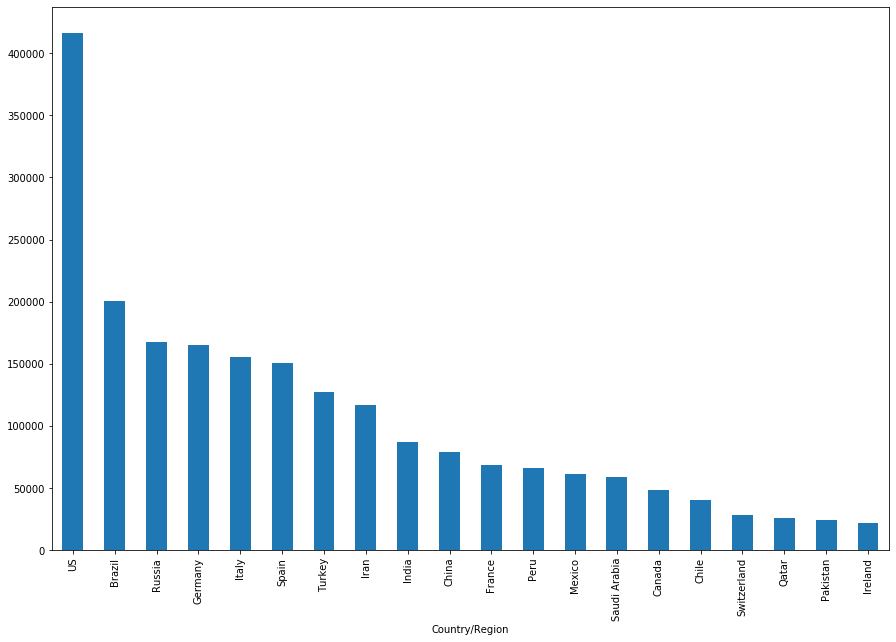

In [12]:
recovered_max.head(20).plot(kind='bar',figsize=(15,10))
recovered[today].max()

In [13]:
confirmed.T


Country/Region,US,Brazil,Russia,United Kingdom,Spain,Italy,France,Germany,India,Turkey,...,Belize,Dominica,Saint Kitts and Nevis,Suriname,Holy See,Seychelles,MS Zaandam,Western Sahara,Papua New Guinea,Lesotho
1/22/20,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,2,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,2,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,5,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/26/20,1680913,391222,362342,266599,236259,230555,182847,181200,150793,158762,...,18,16,15,11,12,11,9,9,8,2
5/27/20,1699176,411821,370680,268619,236259,231139,183038,181524,158086,159797,...,18,16,15,12,12,11,9,9,8,2
5/28/20,1721753,438238,379051,270508,237906,231732,186364,182196,165386,160979,...,18,16,15,12,12,11,9,9,8,2
5/29/20,1746019,465166,387623,272607,238564,232248,186923,182922,173491,162120,...,18,16,15,12,12,11,9,9,8,2


1770165

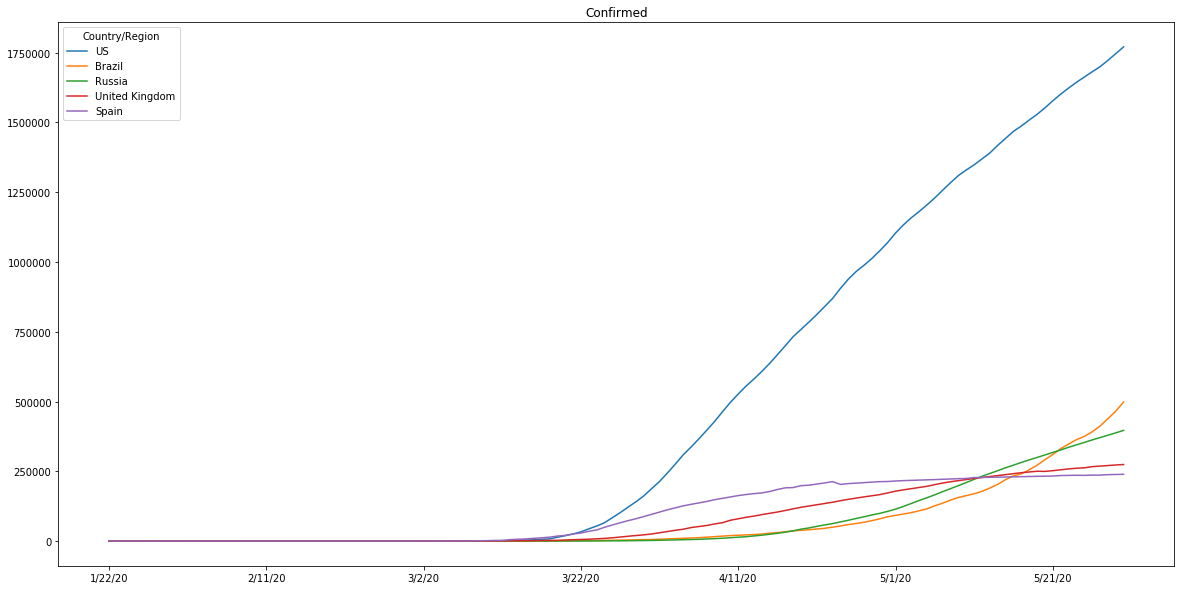

In [14]:
confirmed.head(5).T.plot(figsize=(20,10))
plt.title('Confirmed')
confirmed[today].max()


103776

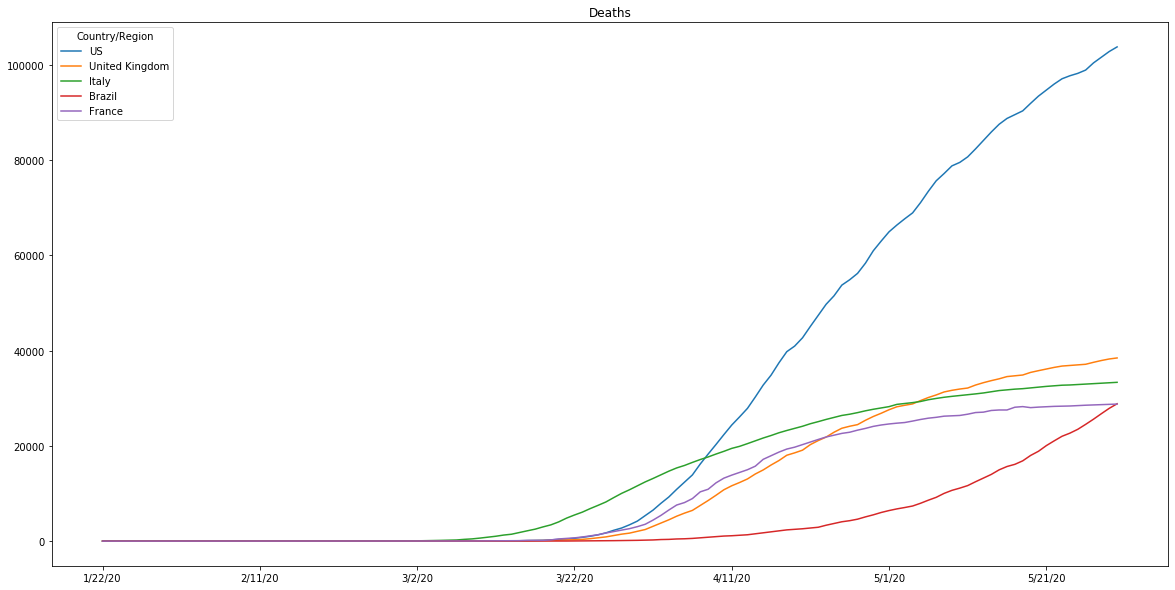

In [15]:
deaths.head(5).T.plot(figsize=(20,10))
plt.title('Deaths')
deaths[today].max()

416461

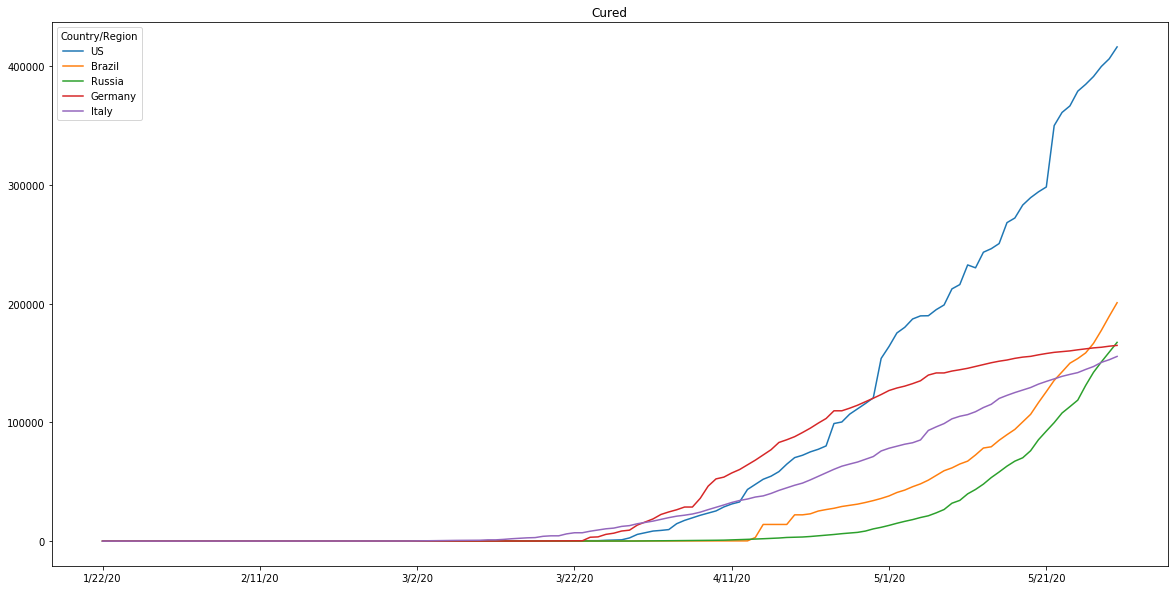

In [16]:
recovered.head(5).T.plot(figsize=(20,10))
plt.title('Cured')
recovered[today].max()

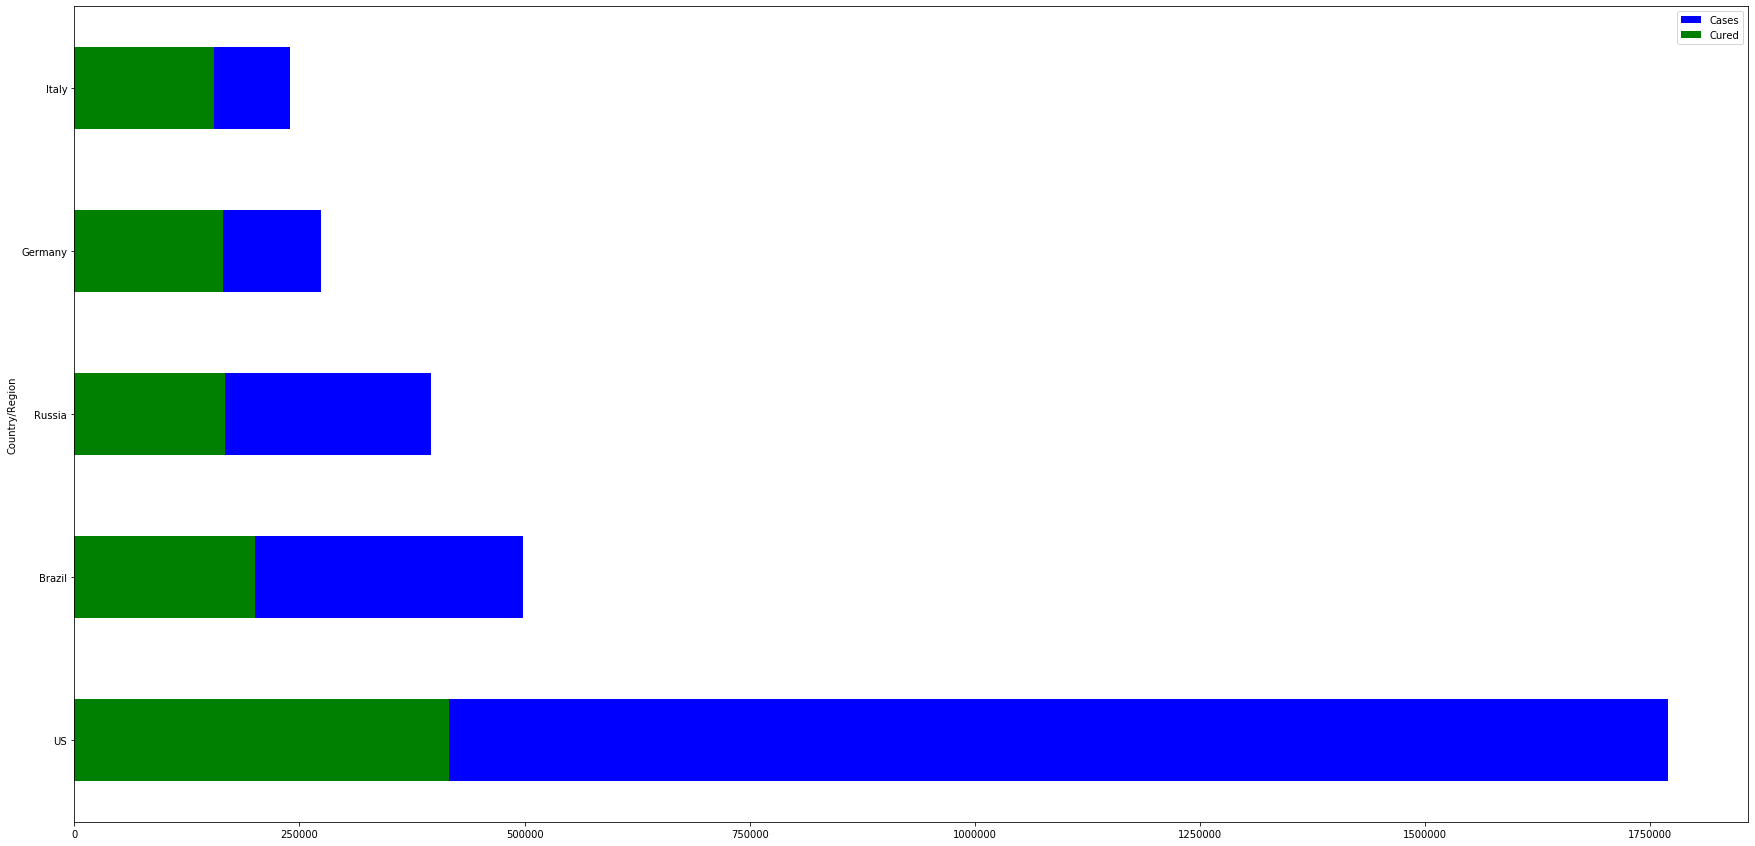

In [17]:
#Confirmed vs Cured
fig,ax=plt.subplots(figsize=(30,15))
# confirmed.head(5).max().plot(kind='barh',x=today,)
# recovered.head(5).plot(kind='barh')
confirmed[today].head(5).plot(kind='barh',color='b',label='Cases')
recovered[today].head(5).plot(kind='barh',color='g',label='Cured')
plt.legend()

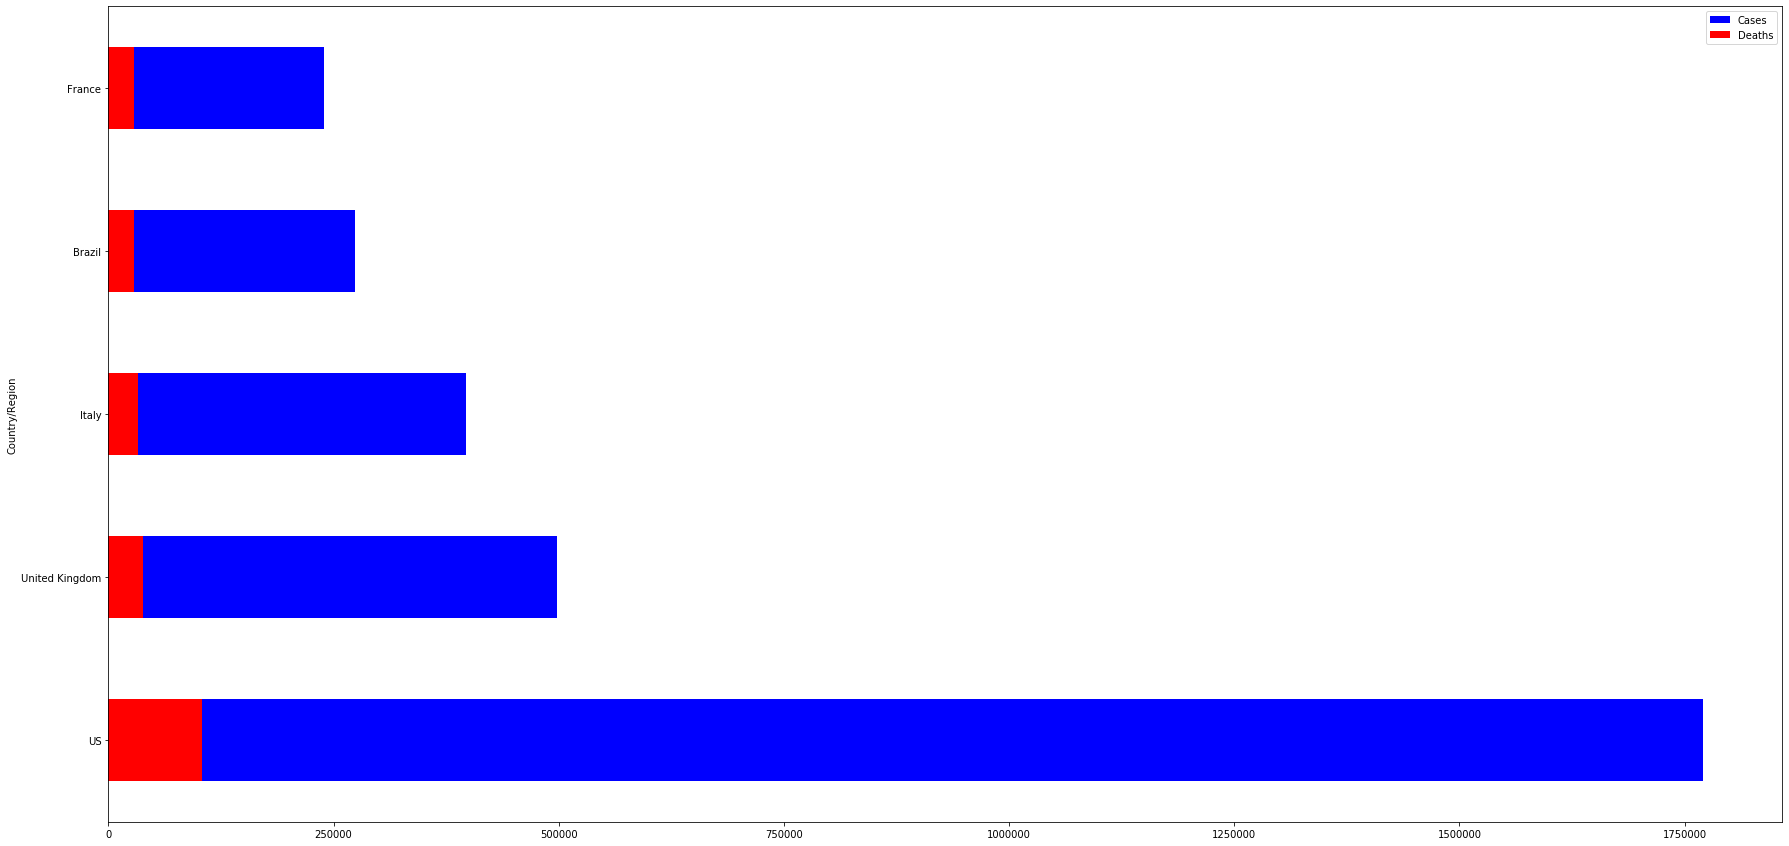

In [18]:
#Confirmedv vs Deaths
fig,ax=plt.subplots(figsize=(30,15))
confirmed[today].head(5).plot(kind='barh',color='b',label='Cases')
deaths[today].head(5).plot(kind='barh',color='r',label='Deaths')
plt.legend()

In [19]:
# confirmed.head(5)

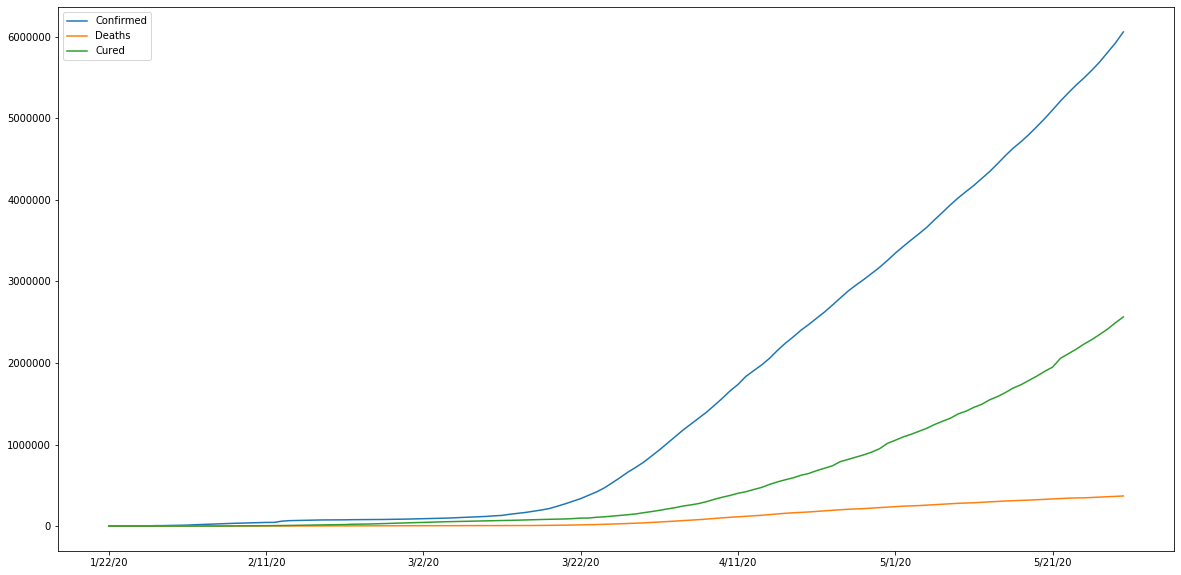

In [20]:
tot_confirmed=confirmed.sum(axis=0)
tot_deaths=deaths.sum(axis=0)
tot_recovered=recovered.sum(axis=0)
tot_confirmed.plot(figsize=(20,10))
tot_deaths.plot()
tot_recovered.plot()
plt.legend(['Confirmed','Deaths','Cured'])

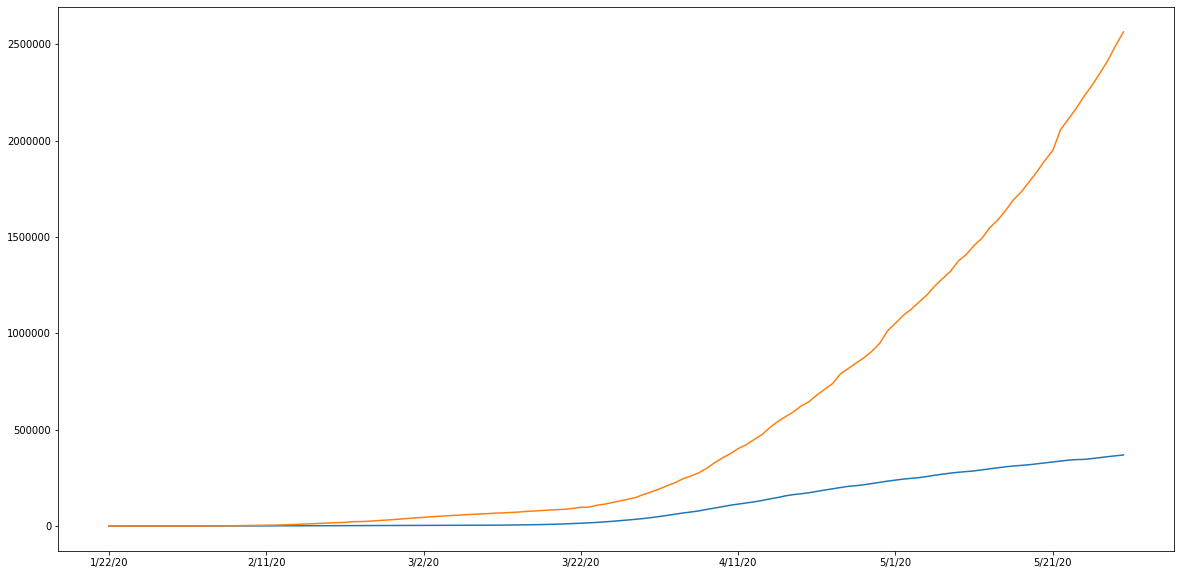

In [21]:
#RECOVERED VS DEATHS
tot_deaths.plot(figsize=(20,10))
tot_recovered.plot()

In [22]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,1577147,1600937,1622612,1643246,1662302,1680913,1699176,1721753,1746019,1770165
Brazil,0,0,0,0,0,0,0,0,0,0,...,310087,330890,347398,363211,374898,391222,411821,438238,465166,498440
Russia,0,0,0,0,0,0,0,0,0,2,...,317554,326448,335882,344481,353427,362342,370680,379051,387623,396575
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,252246,255544,258504,260916,262547,266599,268619,270508,272607,274219
Spain,0,0,0,0,0,0,0,0,0,0,...,233037,234824,235290,235772,235400,236259,236259,237906,238564,239228


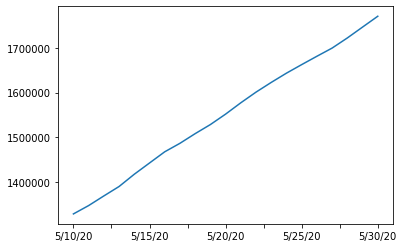

In [23]:
#USA 20 DAYS CASES
confirmed.loc['US',twenty_days:today].plot()

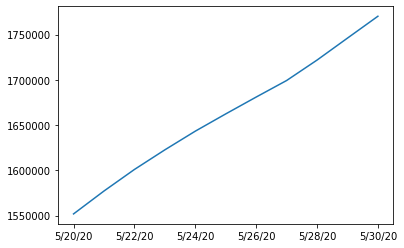

In [24]:
#USA 10 DAYS CASES
confirmed.loc['US',ten_days:today].plot()

In [25]:
#NEW CASES
confirmed.loc['US',today]-confirmed.loc['US',yesterday]

24146

In [26]:
#Deaths today
deaths.loc['US',today]-deaths.loc['US',yesterday]

967

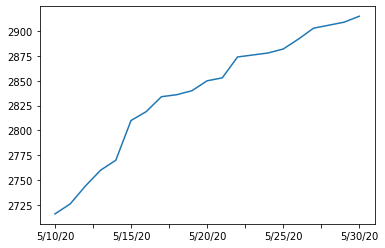

In [27]:
confirmed.loc['Greece',twenty_days:today].plot()

In [28]:
confirmed.loc['Greece',today]-confirmed.loc['Greece',yesterday]

6